## Exploring the Data






In [2]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# Reading the dataset
df=pd.read_csv('train.csv')
print('Shape before deleting duplicate values:', df.shape)

# Removing duplicate rows if any
df=df.drop_duplicates()
print('Shape After deleting duplicate values:', df.shape)

df.head()
# Start observing the Quantitative/Categorical/Qualitative variables

Shape before deleting duplicate values: (2000, 21)
Shape After deleting duplicate values: (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
# Print statistical information about DataFrame
# 1. Measures of Central Tendency -- Mean, Median, Mode
# 2. Measures of Spread --Min, Max, StandardDeviation, Quartiles

# Statistical information for all variables
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Identification of Continuous and Categorical Variables

In [6]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

**Comments**: From the above values we can see that, `blue`, `dual_sim`, `four_g`, `n_cores`,`three_g`, `touch_screen` & `wifi` small number of unique values. So, they can be considered as Categorical variables. Rest of the variables are considered as Continuous type variables.

In [7]:
# Print dimension information (ROWS, COLS) about DataFrame
df.shape

(2000, 21)

In [8]:
#Finding the list of columns in the data
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Viaualization of Individual Columns

### Categorical Columns

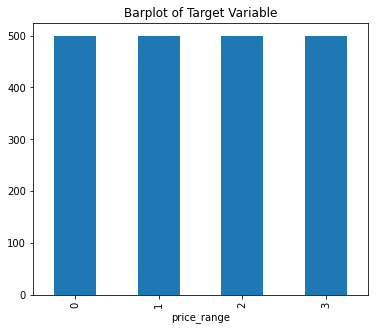

In [9]:
# Creating Bar chart as the Target variable is Categorical
%matplotlib inline
GroupedData=df.groupby('price_range').size()
GroupedData.plot(kind='bar', figsize=(6,5))
plt.title("Barplot of Target Variable")
plt.show()

Comment:  Here, all the classes are well balanced. Means, all the `price_range` groups having equal number of observations

## Generating histogram for continuous predictors

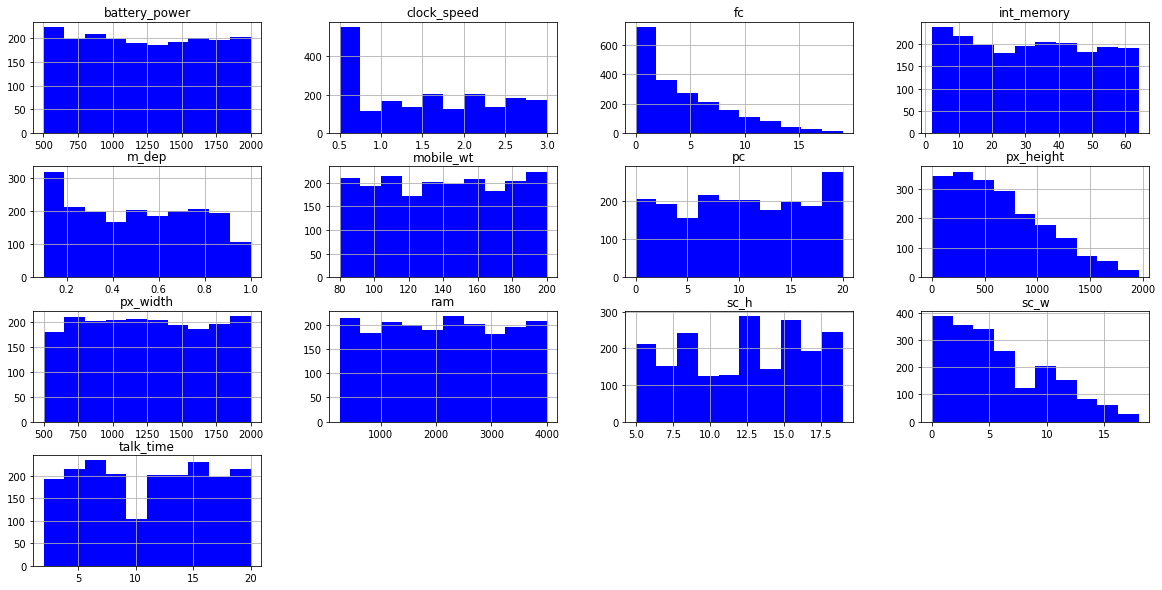

In [10]:
## We can generate histograms for multiple columns by passing a list of column names like ['x', 'y', 'z']
cols=['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt','pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w','talk_time']
df[cols].hist(figsize=(20,10), color='blue')
plt.show()

**Comments**: Looking at the distributions, there is no presense of outliars in the continuous predictors.

### Categorical Columns

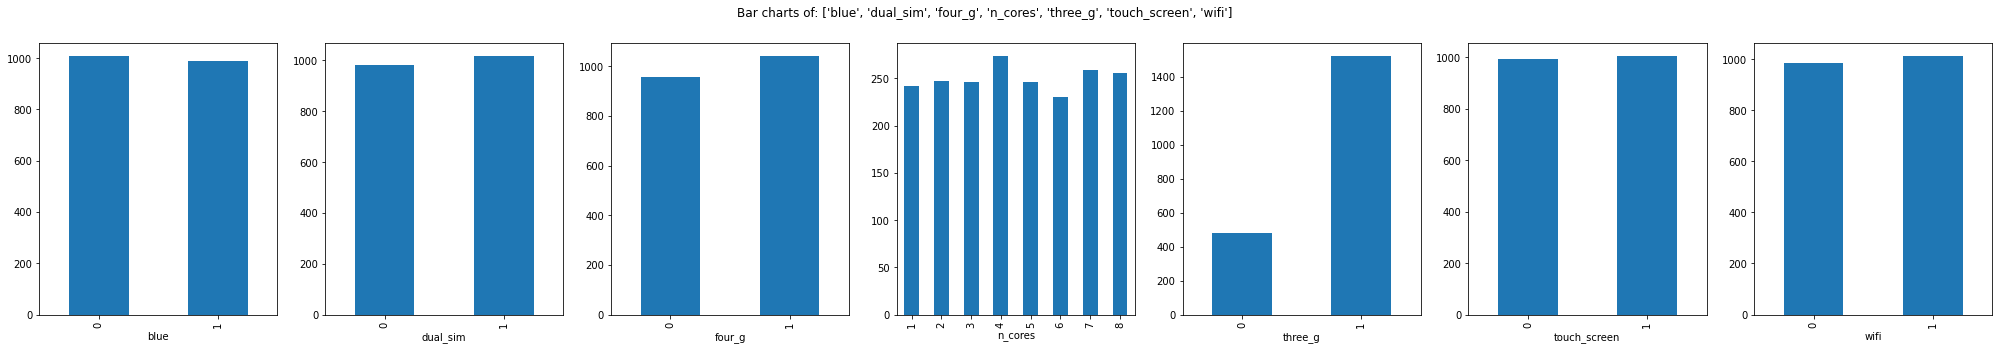

In [11]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(35,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function
PlotBarCharts(inpData=df, colsToPlot=['blue', 'dual_sim', 'four_g', 'n_cores','three_g', 'touch_screen', 'wifi'])

**Comments**: Looking at the barplots of individual columns, we can say that all of the variables are mostly uniformly distributed, except `three_g`. So, there aren't any have an variable with extreme distribution. 

### Check for Missing Values

In [12]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Comments**: There is no missing value present in the dataset.

## Exploring the relationships

In [13]:
correlation = df.corr()
correlation['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [14]:
# Filtering only those columns where absolute correlation > 0.5 with Price
correlation['price_range'][abs(correlation['price_range']) > 0.5 ]

ram            0.917046
price_range    1.000000
Name: price_range, dtype: float64

### Relationship exploration: Categorical Vs Continuous
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [15]:
# Defining a function to find the statistical relationship with all the categorical variables
def AutoAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [16]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 
'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w','talk_time']

SelectedContPredictors = AutoAnova(inpData=df, TargetVariable='price_range', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

battery_power is correlated with price_range | P-Value: 5.948688277085545e-20
clock_speed is NOT correlated with price_range | P-Value: 0.6866751621401248
fc is NOT correlated with price_range | P-Value: 0.5095041590900421
int_memory is correlated with price_range | P-Value: 0.03277693883277447
m_dep is NOT correlated with price_range | P-Value: 0.21245949273717601
mobile_wt is correlated with price_range | P-Value: 0.013117390712873744
pc is NOT correlated with price_range | P-Value: 0.4797489023362932
px_height is correlated with price_range | P-Value: 1.8860848027538453e-12
px_width is correlated with price_range | P-Value: 2.1169108878354858e-14
ram is correlated with price_range | P-Value: 0.0
sc_h is NOT correlated with price_range | P-Value: 0.0832499108428466
sc_w is NOT correlated with price_range | P-Value: 0.17121457684207045
talk_time is NOT correlated with price_range | P-Value: 0.18066864736912272


In [17]:
SelectedContPredictors

['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']

### Categorical Vs Categorical Relationship  ---- Grouped Bar Plot/Cross Tabulation

In [18]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=df['price_range'], columns=df['n_cores'])
CrossTabResult

n_cores,1,2,3,4,5,6,7,8
price_range,,,,,,,,
0,49,69,62,67,59,61,66,67
1,76,59,69,76,51,54,55,60
2,52,57,56,73,66,57,69,70
3,65,62,59,58,70,58,69,59


### Relationship exploration: Categorical Vs Categorical
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

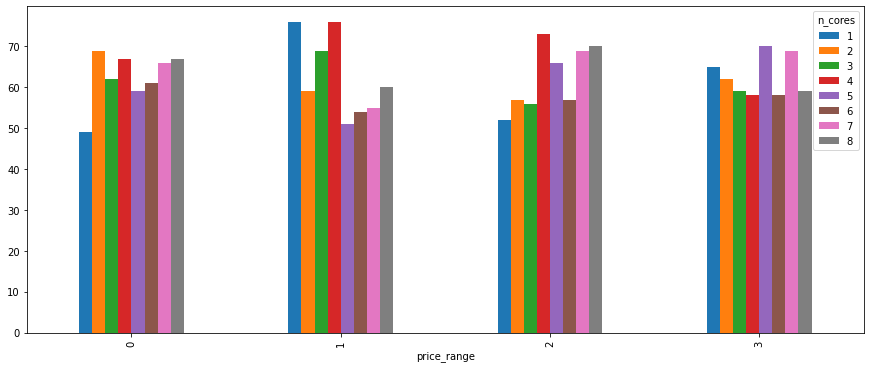

In [19]:
# Visual Inference using Grouped Bar chart
# Notice that Maximum metallic color is used for Petrol cars
CrossTabResult.plot.bar(figsize=(15,6))

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True
* More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [20]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def AutoChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [21]:
CategoricalVariables=['blue', 'dual_sim', 'four_g', 'n_cores','three_g', 'touch_screen', 'wifi' ]
# Calling the function
SelectedCatPredictors = AutoChisq(inpData=df, TargetVariable='price_range', CategoricalVariablesList= CategoricalVariables)

blue is NOT correlated with price_range | P-Value: 0.6980177809451273
dual_sim is NOT correlated with price_range | P-Value: 0.7323497176264594
four_g is NOT correlated with price_range | P-Value: 0.36471408196943356
n_cores is NOT correlated with price_range | P-Value: 0.4882939110661021
three_g is NOT correlated with price_range | P-Value: 0.7116958581372179
touch_screen is NOT correlated with price_range | P-Value: 0.27470114180281896
wifi is NOT correlated with price_range | P-Value: 0.8359905195342197


In [22]:
#SelectedCatPredictors
FinalSelectedPredictors = [SelectedContPredictors + SelectedCatPredictors]
FinalSelectedPredictors

[['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']]

**Comments:** The important features are found by correlation & testing is `battery_power`, `int_memory`, `mobile_wt`, `px_height`, `px_width` and `ram`.

In [23]:
# Taking the dataset in all numeric format
dataNum = pd.get_dummies(df)
dataNum.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## Data Splitting in test and train set

In [28]:
Target = ['price_range']
Predictors = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

#Predictors = FinalSelectedPredictors[0]

X = dataNum[Predictors].values
y = dataNum[Target].values


### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#PredictorScaler=StandardScaler()
#TargetScaler=StandardScaler()

PredictorScaler=MinMaxScaler()
TargetScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetScalerFit=TargetScaler.fit(y)

# Generating the standardized values of X and y
X = PredictorScalerFit.transform(X)
y = TargetScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=123)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1200, 20)
(1200, 1)
(800, 20)
(800, 1)


In [29]:
# Extracting the nuber of features
inp = X_train.shape[1]
inp

20

## Loading Keras

In [30]:
from keras.models import Sequential
from keras.layers import Dense

In [31]:
#Initialising the Artificial Neural Network
classifier = Sequential()

The Sequential model is a linear stack of layers.

In [32]:
# Defining the Input layer and FIRST hidden layer
classifier.add(Dense(units=50, input_dim=inp, kernel_initializer='uniform', activation='relu')) # relu means Rectifier linear unit function

Above line adds the input layer and one hidden layer to our neural network. 

Lets break down the arguments one by one:

* **Dense()**: lets us create a densely connected neural network

* **input_dim**: shape or number of nodes in the input layer = number of predictors
* **units**: the number of neurons or nodes in the current layer (hidden layer) = 50
* **activation** : the activation function applied to each node.”relu” stands for Rectified Linear Unit
* **kernel_initializer**: initial random weights of the layer. We are choosing uniform distribution here

In [33]:
#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=50, kernel_initializer='uniform', activation='relu'))

The line creates and adds another hidden layer to the model with 50 nodes and ‘rectifier’ activation function and uniform distribution of weights. More layers can be added depending on the problem and its complexity.

In [34]:
# Defining the Output layer
# sigmoid means sigmoid activation function
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

Units here is the number of nodes in the output layer. Here we have a single output layer.

Sigmoid or softmax are the commonly used activation functions for
an output layer.

In [35]:
#Compiling the ANN classifier
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

* Optimizer== the algorithm of SGG to keep updating weights
* loss== the loss function to measure the accuracy
* metrics== the way we will compare the accuracy after each step of SGD


In [36]:
# Printing the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1050      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 3,651
Trainable params: 3,651
Non-trainable params: 0
_________________________________________________________________


### Fitting the model with training set

In [37]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
model=classifier.fit(X_train,y_train, batch_size=50 , epochs=1000,verbose=0)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60,2), 'Minutes #############')


############### Total Time Taken:  0.46 Minutes #############


* **X_train**: The training data consisting of only the independent factors
* **Y_train**: The training data consisting of only the dependent factors
* **Batch_size**: the weight is updated after training each batch of samples
* **epochs**: one epoch stands for one complete training of the neural network with all samples.

### Predictions on testing data

In [38]:
Predictions=classifier.predict(X_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
y_test_orig=TargetScalerFit.inverse_transform(y_test)

# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['price_range']=y_test_orig
TestingData['PredictedProb']=Predictions

def probThreshold(inpProb):
    if inpProb>0.0 and inpProb<=0.1:
        return(0)
    elif inpProb>0.1 and inpProb<=0.5:
        return(1)
    elif inpProb>0.5 and inpProb<=0.9:
        return(2)    
    else:
        return(3)

TestingData['PredictedPrice_range']=TestingData['PredictedProb'].apply(probThreshold)
TestingData.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,PredictedProb,PredictedPrice_range
0,1974.0,0.0,0.5,1.0,9.0,0.0,10.0,0.8,145.0,6.0,12.0,530.0,1496.0,1433.0,6.0,1.0,17.0,0.0,0.0,0.0,1.0,0.398848,1
1,1848.0,0.0,1.3,1.0,7.0,0.0,12.0,0.1,178.0,2.0,19.0,195.0,533.0,3915.0,9.0,7.0,8.0,0.0,0.0,1.0,3.0,0.998029,3
2,1831.0,0.0,1.4,1.0,2.0,0.0,43.0,0.9,150.0,5.0,5.0,611.0,1381.0,3834.0,17.0,7.0,13.0,1.0,1.0,1.0,3.0,0.999950,3
3,614.0,0.0,2.9,1.0,3.0,1.0,24.0,0.2,94.0,4.0,7.0,409.0,603.0,1930.0,13.0,12.0,4.0,1.0,0.0,1.0,1.0,0.076798,0
4,584.0,1.0,1.7,1.0,1.0,1.0,19.0,0.4,199.0,4.0,4.0,919.0,1343.0,3996.0,12.0,9.0,17.0,1.0,1.0,1.0,3.0,0.997171,3


### Evaluate the performance on the test

In [39]:
from sklearn import metrics
print(metrics.classification_report(TestingData['price_range'], TestingData['PredictedPrice_range']))
print(metrics.confusion_matrix(TestingData['price_range'], TestingData['PredictedPrice_range']))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       194
         1.0       0.91      0.82      0.86       197
         2.0       0.86      0.91      0.88       214
         3.0       0.93      0.99      0.96       195

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.91       800

[[184  10   0   0]
 [  7 161  29   0]
 [  0   5 194  15]
 [  0   0   2 193]]


Comment: **Here, the overall accuracy is 92% on the test data.**